Multilayer Perceptron Classification Results

Accuracy: 0.9100 (91.00%)

Detailed Classification Report:
              precision    recall  f1-score   support

      Adelie       0.84      1.00      0.91        48
   Chinstrap       1.00      0.61      0.76        23
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.91       100
   macro avg       0.95      0.87      0.89       100
weighted avg       0.92      0.91      0.90       100


Confusion Matrix:
[[48  0  0]
 [ 9 14  0]
 [ 0  0 29]]

Class Label Mapping:
0: Adelie
1: Chinstrap
2: Gentoo


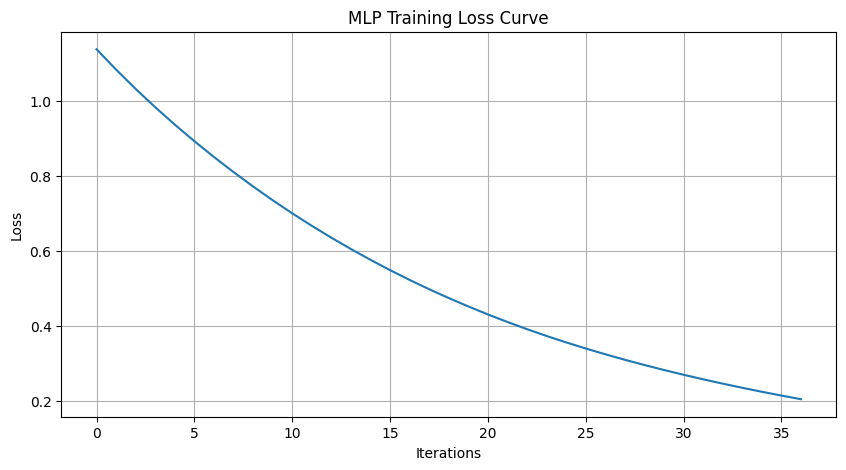

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('penguins_cleaned.csv')

# Encode categorical variables
le_species = LabelEncoder()
le_island = LabelEncoder()
le_sex = LabelEncoder()

df['species'] = le_species.fit_transform(df['species'])
df['island'] = le_island.fit_transform(df['island'])
df['sex'] = le_sex.fit_transform(df['sex'])

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    max_iter=1000,
                    activation='relu',
                    solver='adam',
                    random_state=42,
                    early_stopping=True,
                    validation_fraction=0.2)

mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate accuracy in both decimal and percentage forms
accuracy_decimal = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy_decimal * 100

# Enhanced evaluation metrics
print("="*50)
print("Multilayer Perceptron Classification Results")
print("="*50)
print(f"\nAccuracy: {accuracy_decimal:.4f} ({accuracy_percent:.2f}%)")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_species.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display class labels for reference
print("\nClass Label Mapping:")
for i, species in enumerate(le_species.classes_):
    print(f"{i}: {species}")

# Plot training loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

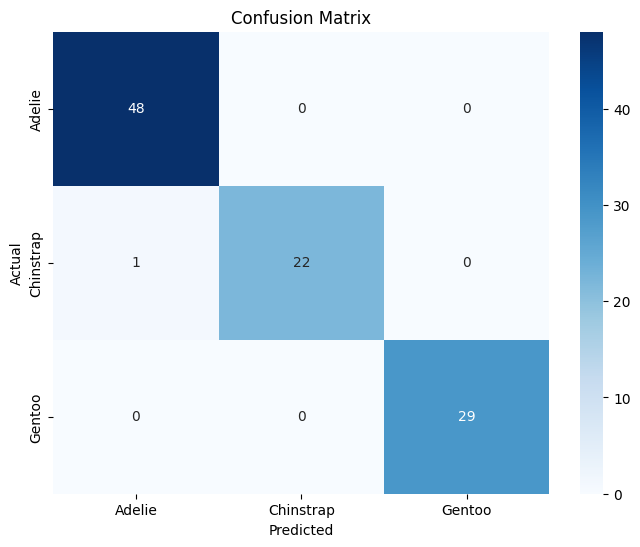

In [ ]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_species.classes_,
            yticklabels=le_species.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
display(df.head())

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       2            39.1           18.7                181   
1        0       2            39.5           17.4                186   
2        0       2            40.3           18.0                195   
3        0       2            36.7           19.3                193   
4        0       2            39.3           20.6                190   

   body_mass_g  sex  
0         3750    1  
1         3800    0  
2         3250    0  
3         3450    0  
4         3650    1